In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df1=pd.read_csv('data/TechCosts.csv')
df2=pd.read_csv('data/TechCostsSergio.tab',sep='\t')
df2=df2.sort_values(['generation_technology','investment_period'],axis=0)
df2=df2.reset_index(drop=True)
df2=df2.fillna(0)
df2=df2.drop('source',axis=1)
df2.to_csv('../../Mateo/switch-inputs-try/gen_new_build_cost.tab',index=False, sep='\t')
df1=df1.rename(columns = {df1.columns.tolist()[0]:'gen_tech'})
df1=df1.sort_values('gen_tech',axis=0)
df1=df1.reset_index(drop=True)
df1=df1.fillna(0)
df2=df2[df2['investment_period']==2020]

In [28]:
df3=pd.DataFrame()
for i in list(set(df1['gen_tech'].tolist())):
    a=df1[df1['gen_tech']==i].mean()
    a['gen_tech']=i
    df3=df3.append(a,ignore_index=True)
b=df3.columns.tolist()
b=[b[2]]+[x for x in b if x not in ["gen_tech"]]
df3=df3[b]
df3=df3.sort_values('gen_tech')
df3=df3.reset_index(drop=True)
df4=pd.concat([df2.reset_index(drop=True),df3],axis=1)
df4[df4.columns.tolist()[2:4]]=df4[df4.columns.tolist()[2:4]]

C:\Users\Aldo\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\Aldo\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


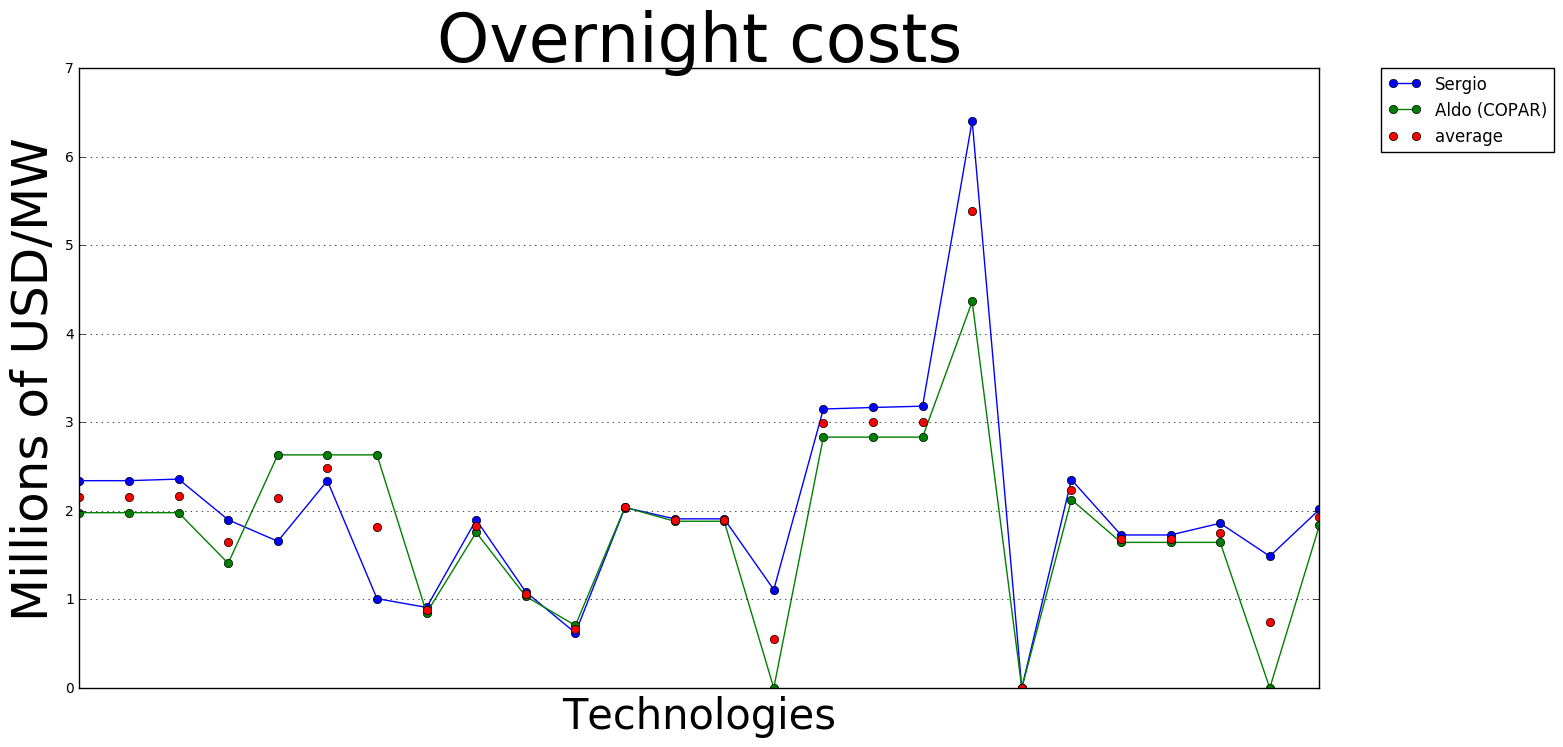

In [37]:
df5=df4[['gen_tech','g_overnight_cost','overnight_cost']]
df5['average']=((df5.iloc[:,1]+df5.iloc[:,2])/2)/1000000
df5['difference']=abs(df5.iloc[:,1]-df5.iloc[:,2])
plt.figure(1,figsize=[16,8],dpi=200)
plt.plot(df5.iloc[:,1]/1000000,marker='o',label='Sergio')
plt.plot(df5.iloc[:,2]/1000000,marker='o',label='Aldo (COPAR)')
plt.title('Overnight costs',fontsize=48)
plt.ylabel('Millions of USD/MW', fontsize=36)
plt.xlabel('Technologies',fontsize=30)
#plt.xticks(df5.index.tolist(),df5['gen_tech'].tolist(),rotation='vertical')
plt.errorbar(range(len(df5.index.tolist())),df5['average'],label='average',fmt='o')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.grid()
frame = plt.gca()
frame.axes.get_xaxis().set_ticks([])
plt.show()

C:\Users\Aldo\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\Aldo\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


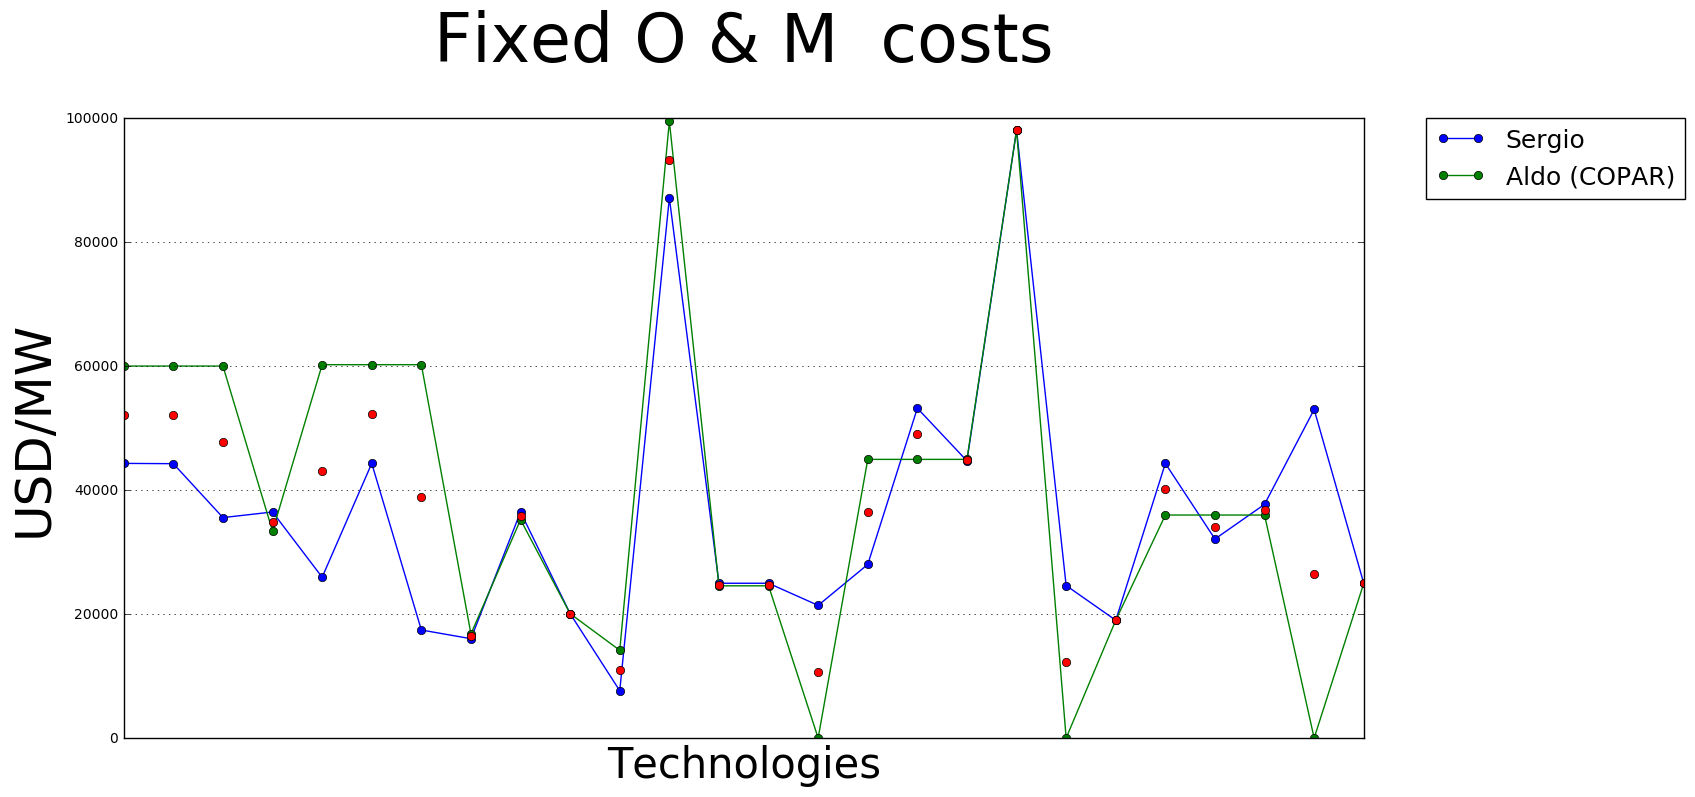

In [35]:
df6=df4[['gen_tech','g_fixed_o_m','fixed_o_m']]
df6['average']=(df6.iloc[:,1]+df6.iloc[:,2])/2
df6['difference']=abs(df6.iloc[:,1]-df6.iloc[:,2])
plt.figure(2,figsize=[16,8],dpi=200)
plt.plot(df6.iloc[:,1],marker='o',label='Sergio')
plt.plot(df6.iloc[:,2],marker='o',label='Aldo (COPAR)')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,fontsize=18)
plt.title('Fixed O & M  costs',fontsize=48,y=1.08)
plt.ylabel('USD/MW',fontsize=36)
#plt.xticks(df5.index.tolist(),df5['gen_tech'].tolist(),rotation='vertical')
plt.xlabel('Technologies',fontsize=30)
plt.errorbar(range(len(df6.index.tolist())),df6['average'],label='average',fmt='o')
plt.grid()
frame = plt.gca()
frame.axes.get_xaxis().set_ticks([])
plt.show()

C:\Users\Aldo\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\Aldo\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


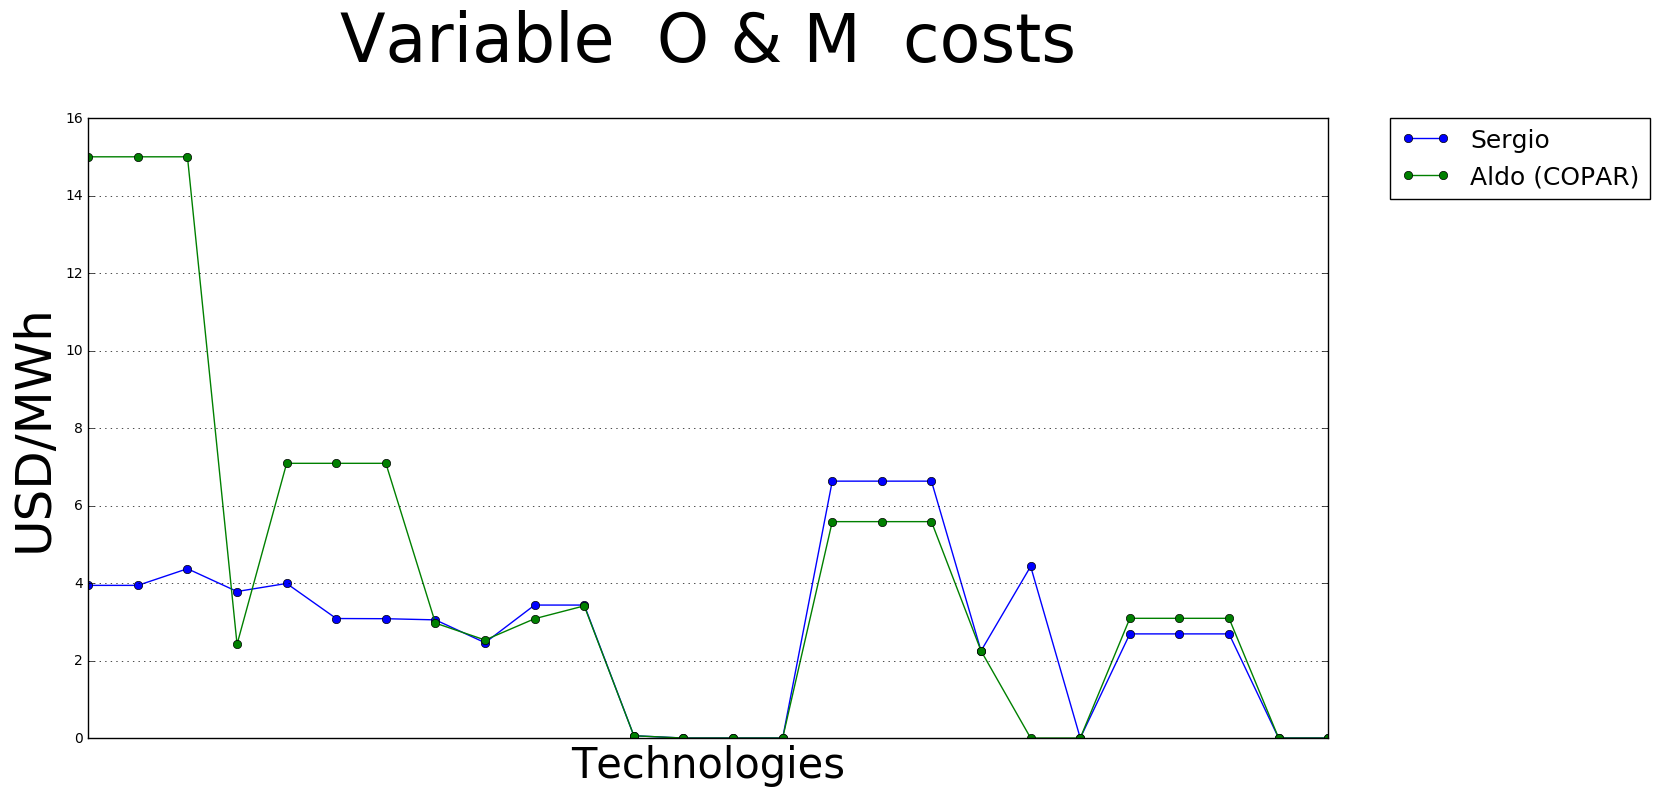

In [36]:
df7=df4[['gen_tech','g_variable_o_m','variable_o_m']]
df7['average']=(df7.iloc[:,1]+df7.iloc[:,2])/2
df7['difference']=abs(df7.iloc[:,1]-df7.iloc[:,2])
plt.figure(2,figsize=[16,8],dpi=200)
plt.plot(df7.iloc[:,1],marker='o',label='Sergio')
plt.plot(df7.iloc[:,2],marker='o',label='Aldo (COPAR)')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,fontsize=18)
plt.title('Variable  O & M  costs',fontsize=48,y=1.08)
plt.ylabel('USD/MWh',fontsize=36)
plt.xticks(df5.index.tolist(),df5['gen_tech'].tolist(),rotation='vertical')
#plt.errorbar(range(len(df7.index.tolist())),df7['average'],label='average',fmt='o')
plt.xlabel('Technologies',fontsize=30)
plt.grid()
frame = plt.gca()
frame.axes.get_xaxis().set_ticks([])
plt.show()